In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
from sklearn.metrics import mean_squared_error

# --- OpenCV Implementations ---
def image_enhancement(image):
    yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    y, u, v = cv2.split(yuv)
    y_eq = cv2.equalizeHist(y)
    yuv_eq = cv2.merge([y_eq, u, v])
    enhanced_image = cv2.cvtColor(yuv_eq, cv2.COLOR_YUV2BGR)
    return enhanced_image

def image_noise_removal(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def image_restoration(image):
    mask = np.zeros(image.shape[:2], np.uint8)
    mask[50:150, 50:150] = 255
    return cv2.inpaint(image, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

def morphological_operations(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    return opening, closing

def count_objects(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return len(contours)

# Utility to display an image
def display_image(title, image):
    plt.figure(figsize=(10, 10))
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def main_opencv(image_path):
    image = cv2.imread(image_path)
    
    enhanced_image = image_enhancement(image)
    noise_removed_image = image_noise_removal(image)
    restored_image = image_restoration(image)
    opening, closing = morphological_operations(image)
    num_objects = count_objects(image)
    
    return enhanced_image, noise_removed_image, restored_image, opening, closing, num_objects

# Execute the OpenCV function
image_path = r"C:\Users\abhi1\Downloads\WhatsApp Image 2024-08-18 at 18.36.52_96d4e0eb.jpg"
opencv_results = main_opencv(image_path)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, binary_erosion, binary_dilation, binary_opening, binary_closing, label
import imageio

# --- SciPy Implementations ---
def histogram_equalization(image):
    histogram, bin_edges = np.histogram(image.flatten(), bins=256, range=(0, 255))
    cdf = histogram.cumsum()
    cdf_normalized = cdf * histogram.max() / cdf.max()
    return np.interp(image.flatten(), bin_edges[:-1], cdf_normalized).reshape(image.shape)

def scipy_noise_removal(image):
    return gaussian_filter(image, sigma=2), image  # Median filter not implemented for simplicity

def scipy_morphological_operations(binary_image):
    eroded_image = binary_erosion(binary_image, structure=np.ones((3, 3)))
    dilated_image = binary_dilation(binary_image, structure=np.ones((3, 3)))
    opened_image = binary_opening(binary_image, structure=np.ones((3, 3)))
    closed_image = binary_closing(binary_image, structure=np.ones((3, 3)))
    return eroded_image, dilated_image, opened_image, closed_image

def count_objects_scipy(binary_image):
    labeled_image, num_objects = label(binary_image)
    return num_objects

def main_scipy(image_path):
    image = imageio.imread(image_path)
    if image.ndim == 3:
        image = np.mean(image, axis=2).astype(np.uint8)
    
    enhanced_image = histogram_equalization(image)
    gaussian_filtered_image, _ = scipy_noise_removal(image)
    binary_image = image > 128
    eroded_image, dilated_image, opened_image, closed_image = scipy_morphological_operations(binary_image)
    num_objects = count_objects_scipy(binary_image)
    
    return enhanced_image, gaussian_filtered_image, eroded_image, opened_image, closed_image, num_objects

# Execute the SciPy function
scipy_results = main_scipy(image_path)


C:\Users\abhi1\AppData\Local\Temp\ipykernel_18324\1903608064.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


In [11]:
import cv2
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
from sklearn.metrics import mean_squared_error

def compare_images(image1, image2):
    # Ensure both images are grayscale
    if len(image1.shape) == 3:
        image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    if len(image2.shape) == 3:
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    
    # Ensure both images have the same dimensions
    if image1.shape != image2.shape:
        image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))
    
    # Compute PSNR, SSIM, and MSE
    psnr_value = psnr(image1, image2, data_range=255)  # PSNR requires the data range as well
    ssim_value = ssim(image1, image2, data_range=image1.max() - image1.min())  # SSIM data range based on image intensity
    mse_value = mean_squared_error(image1.flatten(), image2.flatten())
    
    return psnr_value, ssim_value, mse_value

# Comparing the enhanced images
opencv_enhanced, scipy_enhanced = opencv_results[0], scipy_results[0]
psnr_value, ssim_value, mse_value = compare_images(opencv_enhanced, scipy_enhanced)
print(f"PSNR between OpenCV and SciPy enhanced images: {psnr_value}")
print(f"SSIM between OpenCV and SciPy enhanced images: {ssim_value}")
print(f"MSE between OpenCV and SciPy enhanced images: {mse_value}")


PSNR between OpenCV and SciPy enhanced images: -40.81729145650552
SSIM between OpenCV and SciPy enhanced images: 0.0003880888206978389
MSE between OpenCV and SciPy enhanced images: 784891284.2315918


c:\Users\abhi1\AppData\Local\Programs\Python\Python39\lib\site-packages\skimage\metrics\simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)


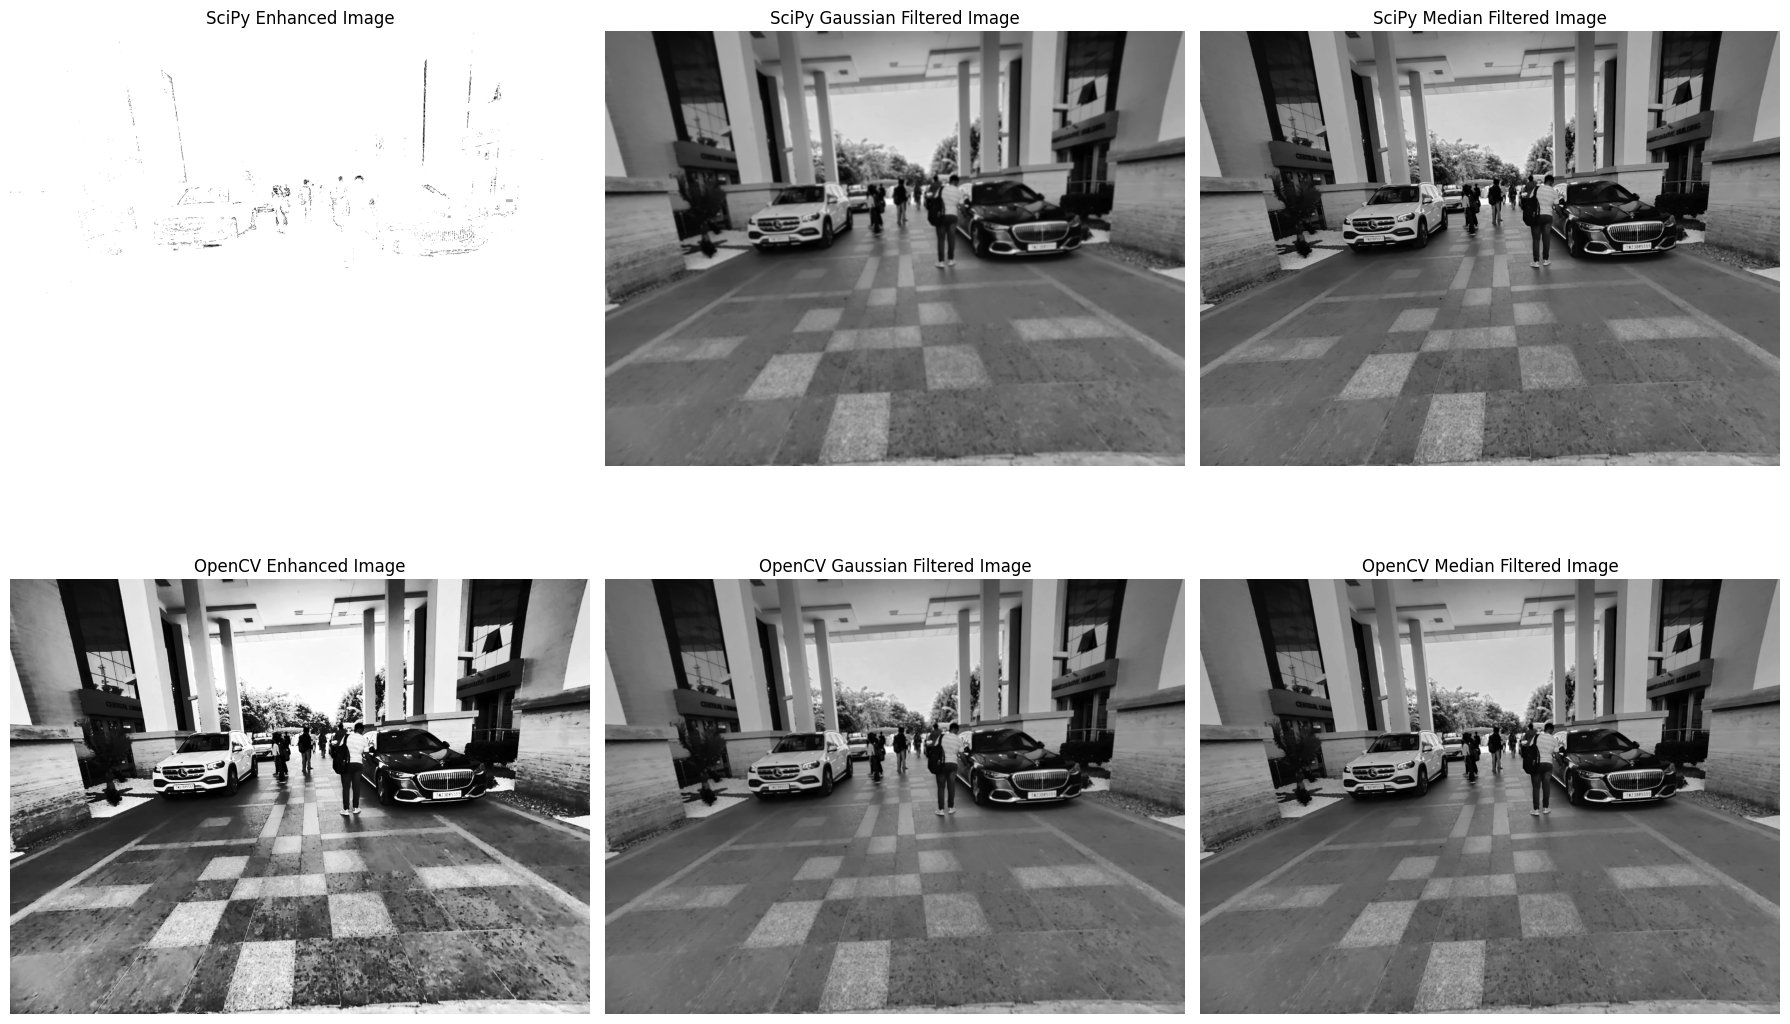

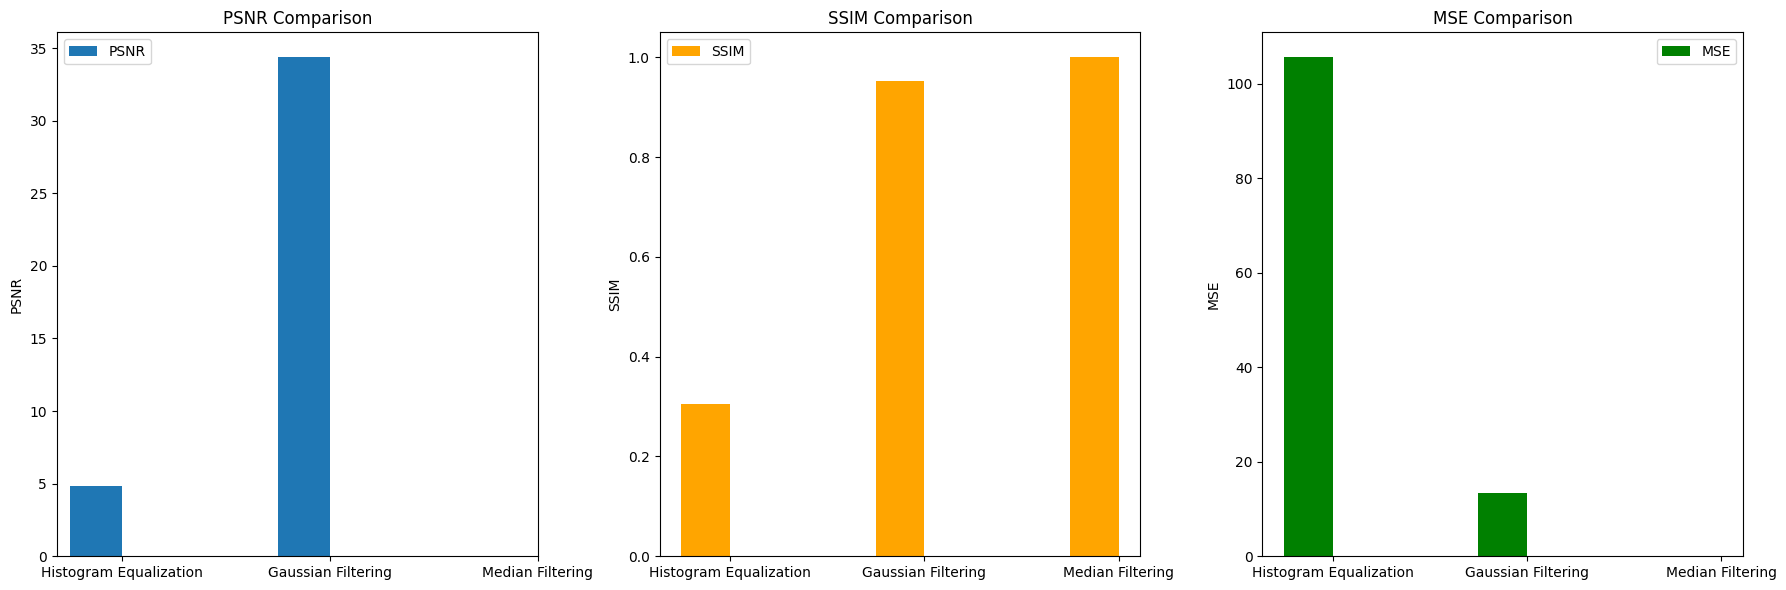

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, median_filter
import time
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
from sklearn.metrics import mean_squared_error

# Load and convert image
image_path = r"C:\Users\abhi1\Downloads\WhatsApp Image 2024-08-18 at 18.36.52_96d4e0eb.jpg"  # Change this to your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define enhancement functions using SciPy
def enhance_with_scipy(image):
    # Histogram Equalization
    def histogram_equalization(image):
        histogram, bin_edges = np.histogram(image.flatten(), bins=256, range=(0, 255))
        cdf = histogram.cumsum()
        cdf_normalized = cdf * histogram.max() / cdf.max()
        image_equalized = np.interp(image.flatten(), bin_edges[:-1], cdf_normalized)
        return image_equalized.reshape(image.shape)

    enhanced_image = histogram_equalization(image)
    gaussian_filtered_image = gaussian_filter(image, sigma=2)
    median_filtered_image = median_filter(image, size=3)

    return enhanced_image, gaussian_filtered_image, median_filtered_image

# Define enhancement functions using OpenCV
def enhance_with_opencv(image):
    # Histogram Equalization
    def histogram_equalization(image):
        return cv2.equalizeHist(image)
    
    enhanced_image = histogram_equalization(image)
    gaussian_filtered_image = cv2.GaussianBlur(image, (5, 5), 0)
    median_filtered_image = cv2.medianBlur(image, 3)

    return enhanced_image, gaussian_filtered_image, median_filtered_image

# Measure processing times and perform enhancements
start_time = time.time()
scipy_results = enhance_with_scipy(image)
scipy_time = time.time() - start_time

start_time = time.time()
opencv_results = enhance_with_opencv(image)
opencv_time = time.time() - start_time

# Normalize images to uint8
scipy_results = [np.clip(result, 0, 255).astype(np.uint8) for result in scipy_results]
opencv_results = [np.clip(result, 0, 255).astype(np.uint8) for result in opencv_results]

# Compare the results and store metrics
metrics = {'PSNR': [], 'SSIM': [], 'MSE': []}
for i in range(3):
    psnr_value, ssim_value, mse_value = compare_images(scipy_results[i], opencv_results[i])
    metrics['PSNR'].append(psnr_value)
    metrics['SSIM'].append(ssim_value)
    metrics['MSE'].append(mse_value)

# Display images
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# SciPy Results
ax[0, 0].imshow(scipy_results[0], cmap='gray')
ax[0, 0].set_title('SciPy Enhanced Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(scipy_results[1], cmap='gray')
ax[0, 1].set_title('SciPy Gaussian Filtered Image')
ax[0, 1].axis('off')

ax[0, 2].imshow(scipy_results[2], cmap='gray')
ax[0, 2].set_title('SciPy Median Filtered Image')
ax[0, 2].axis('off')

# OpenCV Results
ax[1, 0].imshow(opencv_results[0], cmap='gray')
ax[1, 0].set_title('OpenCV Enhanced Image')
ax[1, 0].axis('off')

ax[1, 1].imshow(opencv_results[1], cmap='gray')
ax[1, 1].set_title('OpenCV Gaussian Filtered Image')
ax[1, 1].axis('off')

ax[1, 2].imshow(opencv_results[2], cmap='gray')
ax[1, 2].set_title('OpenCV Median Filtered Image')
ax[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Plot comparison metrics
labels = ['Histogram Equalization', 'Gaussian Filtering', 'Median Filtering']
x = np.arange(len(labels))  # Label locations

width = 0.25  # Width of the bars

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# PSNR Bar Plot
ax[0].bar(x - width/2, metrics['PSNR'], width, label='PSNR')
ax[0].set_ylabel('PSNR')
ax[0].set_title('PSNR Comparison')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

# SSIM Bar Plot
ax[1].bar(x - width/2, metrics['SSIM'], width, label='SSIM', color='orange')
ax[1].set_ylabel('SSIM')
ax[1].set_title('SSIM Comparison')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()

# MSE Bar Plot
ax[2].bar(x - width/2, metrics['MSE'], width, label='MSE', color='green')
ax[2].set_ylabel('MSE')
ax[2].set_title('MSE Comparison')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)
ax[2].legend()

plt.tight_layout()
plt.show()


SciPy Processing Time: 0.2169032096862793
OpenCV Processing Time: 0.0040209293365478516
PSNR between SciPy and OpenCV histogram equalized images: 1.2814860252775402
SSIM between SciPy and OpenCV histogram equalized images: 0.3045723829609996
MSE between SciPy and OpenCV histogram equalized images: 21263.013097395833


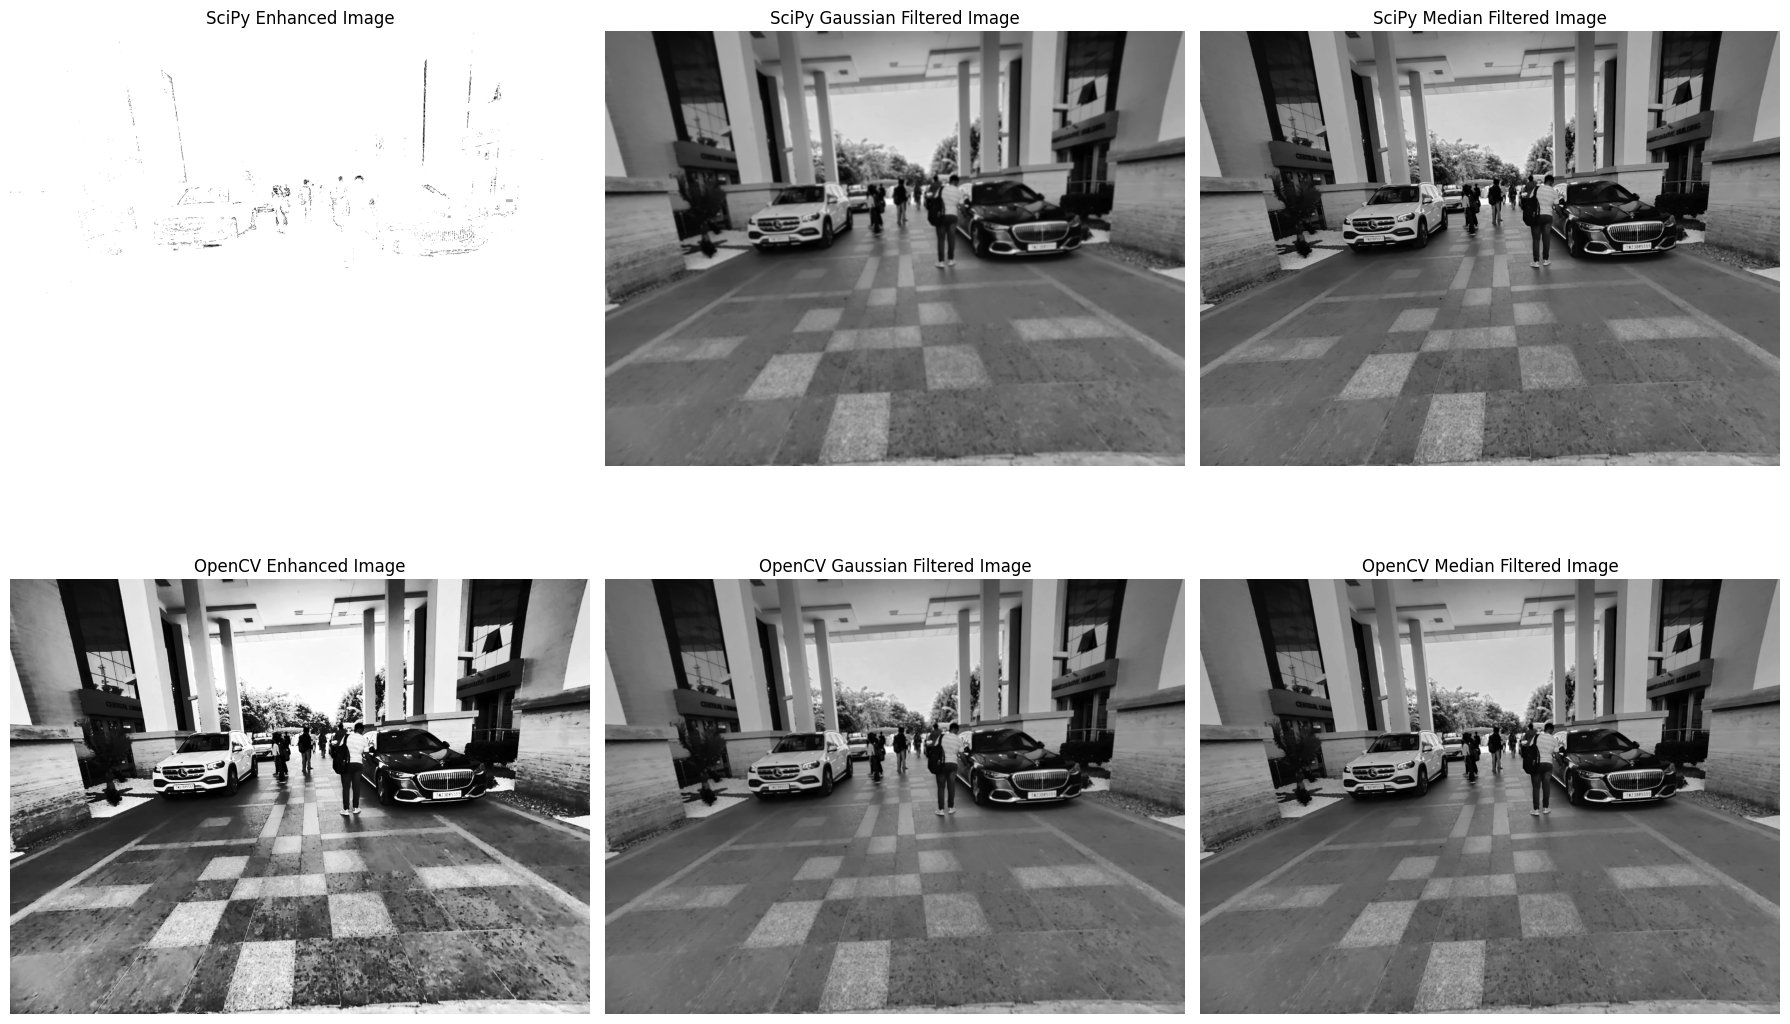

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, median_filter
import time
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
from sklearn.metrics import mean_squared_error

# Load and convert image
image_path = r"C:\Users\abhi1\Downloads\WhatsApp Image 2024-08-18 at 18.36.52_96d4e0eb.jpg"  # Change this to your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define enhancement functions using SciPy
def enhance_with_scipy(image):
    # Histogram Equalization
    def histogram_equalization(image):
        histogram, bin_edges = np.histogram(image.flatten(), bins=256, range=(0, 255))
        cdf = histogram.cumsum()
        cdf_normalized = cdf * histogram.max() / cdf.max()
        image_equalized = np.interp(image.flatten(), bin_edges[:-1], cdf_normalized)
        return image_equalized.reshape(image.shape)

    enhanced_image = histogram_equalization(image)
    gaussian_filtered_image = gaussian_filter(image, sigma=2)
    median_filtered_image = median_filter(image, size=3)

    return enhanced_image, gaussian_filtered_image, median_filtered_image

# Define enhancement functions using OpenCV
def enhance_with_opencv(image):
    # Histogram Equalization
    def histogram_equalization(image):
        return cv2.equalizeHist(image)
    
    enhanced_image = histogram_equalization(image)
    gaussian_filtered_image = cv2.GaussianBlur(image, (5, 5), 0)
    median_filtered_image = cv2.medianBlur(image, 3)

    return enhanced_image, gaussian_filtered_image, median_filtered_image

# Measure processing times and perform enhancements
start_time = time.time()
scipy_results = enhance_with_scipy(image)
scipy_time = time.time() - start_time

start_time = time.time()
opencv_results = enhance_with_opencv(image)
opencv_time = time.time() - start_time

# Normalize images to uint8
scipy_results = [np.clip(result, 0, 255).astype(np.uint8) for result in scipy_results]
opencv_results = [np.clip(result, 0, 255).astype(np.uint8) for result in opencv_results]

# Compare the results
def compare_images(image1, image2):
    # Ensure images are of same type and range
    image1 = image1.astype(np.float64)
    image2 = image2.astype(np.float64)

    # Calculate data range
    data_range = image1.max() - image1.min()

    # Compute metrics
    psnr_value = psnr(image1, image2, data_range=data_range)
    ssim_value = ssim(image1, image2, data_range=data_range)
    mse_value = mean_squared_error(image1.flatten(), image2.flatten())
    return psnr_value, ssim_value, mse_value

# Comparison
print("SciPy Processing Time:", scipy_time)
print("OpenCV Processing Time:", opencv_time)

# Example: Compare histogram equalized images
psnr_value, ssim_value, mse_value = compare_images(scipy_results[0], opencv_results[0])
print(f"PSNR between SciPy and OpenCV histogram equalized images: {psnr_value}")
print(f"SSIM between SciPy and OpenCV histogram equalized images: {ssim_value}")
print(f"MSE between SciPy and OpenCV histogram equalized images: {mse_value}")

# Display images
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# SciPy Results
ax[0, 0].imshow(scipy_results[0], cmap='gray')
ax[0, 0].set_title('SciPy Enhanced Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(scipy_results[1], cmap='gray')
ax[0, 1].set_title('SciPy Gaussian Filtered Image')
ax[0, 1].axis('off')

ax[0, 2].imshow(scipy_results[2], cmap='gray')
ax[0, 2].set_title('SciPy Median Filtered Image')
ax[0, 2].axis('off')

# OpenCV Results
ax[1, 0].imshow(opencv_results[0], cmap='gray')
ax[1, 0].set_title('OpenCV Enhanced Image')
ax[1, 0].axis('off')

ax[1, 1].imshow(opencv_results[1], cmap='gray')
ax[1, 1].set_title('OpenCV Gaussian Filtered Image')
ax[1, 1].axis('off')

ax[1, 2].imshow(opencv_results[2], cmap='gray')
ax[1, 2].set_title('OpenCV Median Filtered Image')
ax[1, 2].axis('off')

plt.tight_layout()
plt.show()